<a href="https://colab.research.google.com/github/Ruanvans/GAN-time-series-implementation/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The following code will serve as the GAN network employed in my disseratation**

**Ruan van Schalkwyk**                                                            
**6459265**

**Supervisor: Yoachu Jin** 

**University of Surrey Computer Science** 


# **Necessary libraries and tools**

In [1]:
#libraries and tools necessary to import and visualize data
from google.colab import files
import pandas as pd
import requests 
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import pyplot

#libraries to create the models and visualize models
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils.vis_utils import plot_model
from numpy import hstack 
from numpy import zeros 
from numpy import ones 
from numpy.random import randn 
from numpy.random import rand
import random

Using TensorFlow backend.


# **Data Collection**

The below cells of code are used to retrieve the data used within the project from the AlphaVantage API. The first cell works directly with the API and the second cell is used to format the data into the correct format (csv file) and then downloads the data so that it can be cleaned for further use

In [0]:
Key = 'WS42XHAOBGP40QEM'
sym= 'AAPL'

fname = 'daily' + sym +'.csv'

if not os.path.isfile(fname):
  v = urllib.request.urlopen("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=" + sym + "&apikey=" + Key + "&outputsize=full&datatype=csv").read()
  with open(fname, 'wb') as f:
    f.write(v)

In [0]:
df = pd.read_csv(fname)
df = pd.DataFrame(df)
df.to_csv('Apple.csv')
files.download('Apple.csv')
df

,timestamp,open,high,low,close,volume
0,2020-05-11,308.10,317.05,307.24,315.01,36486561
1,2020-05-08,305.64,310.35,304.29,310.13,33511985
2,2020-05-07,303.22,305.17,301.97,303.74,28803764
3,2020-05-06,300.46,303.24,298.87,300.63,35583438
4,2020-05-05,295.06,301.00,294.46,297.56,36937795
...,...,...,...,...,...,...
5027,2000-05-16,104.52,109.06,102.75,105.69,3932600
5028,2000-05-15,108.06,108.06,100.12,101.00,6061900
5029,2000-05-12,106.00,110.50,104.77,107.62,2740300
5030,2000-05-11,101.37,104.25,99.00,102.81,4462000


# **Data preprocessign**

Below cell provides convenience when uploading the data as it is faster to upload a zip file with all the cleaned data to google colab than to upload individual files. 

In [0]:
!unzip 'final_data.zip'

Archive:  final_data.zip
  inflating: boeing.csv              
  inflating: Intercontinental.csv    
  inflating: JPMorgan.csv            
  inflating: Microsoft.csv           
  inflating: pfizer.csv              


importation of the data from the cleaned csv files

In [0]:
intercontinental = pd.read_csv('Intercontinental.csv', parse_dates=True, index_col=0)
boeing = pd.read_csv('boeing.csv', parse_dates=True, index_col=0)
jpmorgan = pd.read_csv('JPMorgan.csv', parse_dates=True, index_col=0)
microsoft = pd.read_csv('Microsoft.csv', parse_dates=True, index_col=0)
pfizer = pd.read_csv('pfizer.csv', parse_dates=True, index_col=0)

# **Visualisation of the chosen stocks**

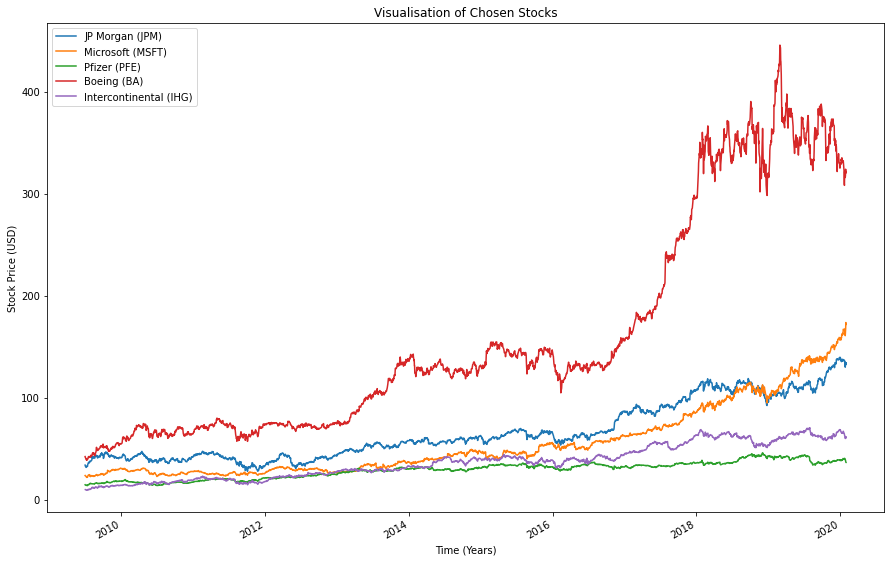

In [0]:
Intercontinental = intercontinental['open']
Boeing = boeing['open']
JPmorgan = jpmorgan['open']
Microsoft = microsoft['open']
Pfizer = pfizer['open']

plt.figure(figsize=(15,10))
JPmorgan.plot(label = 'JP Morgan (JPM)')
Microsoft.plot(label = 'Microsoft (MSFT)')
Pfizer.plot(label = 'Pfizer (PFE)')
Boeing.plot(label= 'Boeing (BA)')
Intercontinental.plot(label = 'Intercontinental (IHG)')
plt.title(label = 'Visualisation of Chosen Stocks')
plt.legend(loc='upper left')
plt.ylabel(ylabel= 'Stock Price (USD)')
plt.xlabel(xlabel= 'Time (Years)')
plt.savefig('stocks.png', bbox_inches ='tight')
files.download('stocks.png')
plt.show()

# **Vanilla GAN**

## **Creating the architecture**

In [0]:
def Generator_method(latent_space, num_outputs=2):  
  model = Sequential()
  model.add(Dense(50, activation='relu', kernel_initializer='he_uniform', input_dim=latent_space))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_outputs, activation='linear'))
  return model

#latent_space = 10
#model = Generator(latent_space)
#model.summary()
#plot_model(model, to_file='generator_structure.png', show_shapes=True, show_layer_names=True)

In [0]:
def Discriminator_method(num_inputs=2): 
  model = Sequential()
  model.add(Dense(50, activation='relu', kernel_initializer='he_uniform', input_dim=num_inputs))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#model = Discriminator()
#model.summary()
#plot_model(model, to_file='discriminator_structure.png', show_shapes=True, show_layer_names=True)

In [0]:
def GAN_method(Generator, Discriminator): 
  Discriminator_model.trainable = False
  model = Sequential()
  model.add(Generator_model)
  model.add(Discriminator_model)
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

#latent_space = 10
#Generator_model = Generator(latent_space)
#Discriminator_model = Discriminator()

#model = GAN(Generator_model, Discriminator_model)
#model.summary()
#plot_model(model, to_file='gan_structure.png', show_shapes=True, show_layer_names=True)

## **testing the GAN**

In [0]:
def Generate_random_numbers(n):
    for x in range(n):
      random.uniform(1,20)


In [0]:
def Real(n):
  x = rand(n) -0.5
  x_quartic = x * x 

  x = x.reshape(n,1)
  x_quartic = x_quartic.reshape(n,1)

  X = hstack((x,x_quartic))

  y = ones((n,1))

  return X,y

In [0]:
def Gan_input(latent_space, n):
	# generate points in the latent space
	x_input = randn(latent_space * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_space)
	return x_input

In [0]:
def Fake(Generator, latent_space, n):
  generator_input = Gan_input(latent_space, n)

  X = Generator.predict(generator_input)
	
  y = zeros((n,1))

  return X,y

In [0]:
def gan_performance(epoch, latent_space, Discriminator, Generator, n=100):

  Xr, yr = Real(n) 
  Xf, yf = Fake(Generator, latent_space, n)

  _, accuracy_of_real = Discriminator.evaluate(Xr,yr, verbose =0)
  _, accuracy_of_fake = Discriminator.evaluate(Xf,yf, verbose =0)

  print(epoch +1, accuracy_of_real, accuracy_of_fake)
  pyplot.scatter(Xr[:,0], Xr[:,1], color='green')
  pyplot.scatter(Xf[:,0], Xf[:,0], color='red')
  pyplot.show()

In [0]:
def train(GN, D, G, latent_space, epochs=20000, batch_size= 128, eval =2500):
  half_size = int(batch_size/2)
  for i in range(epochs): 
    Xr, yr = Real(half_size)
    Xf, yf = Fake(G, latent_space, half_size)

    D.train_on_batch(Xr,yr)
    D.train_on_batch(Xf,yf)

    Xgan = Gan_input(latent_space, batch_size)
    ygan = ones((batch_size, 1))
    GN.train_on_batch(Xgan, ygan)

    if (i+1) % eval == 0:
      gan_performance(i, latent_space, D, G)

2500 1.0 0.9900000095367432


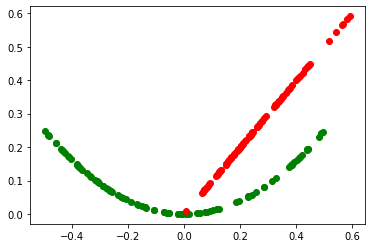

5000 1.0 1.0


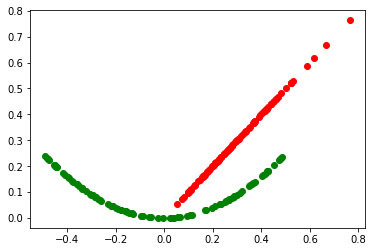

7500 1.0 1.0


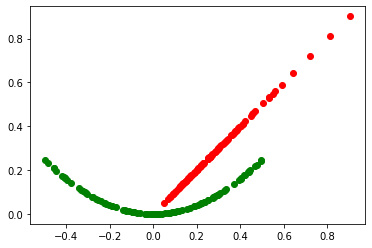

KeyboardInterrupt: ignored

In [158]:
latent_space = 10
Generator = Generator_method(latent_space)
Discriminator = Discriminator_method()
GAN = GAN_method(Generator, Discriminator)
train(GAN, Discriminator, Generator, latent_space)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1999 0.49000000953674316 0.4300000071525574


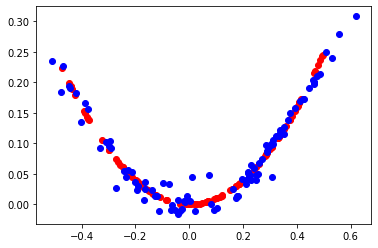

3999 0.6000000238418579 0.46000000834465027


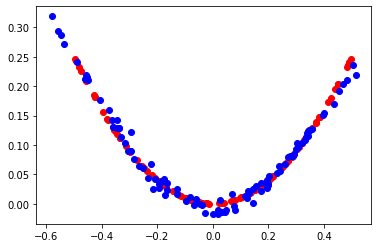

5999 0.6600000262260437 0.5299999713897705


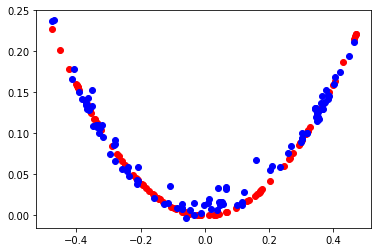

7999 0.7599999904632568 0.3100000023841858


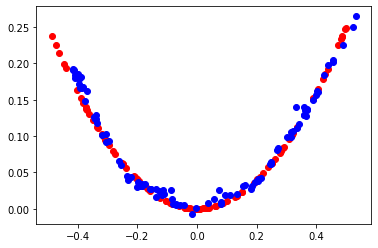

9999 0.4399999976158142 0.5600000023841858


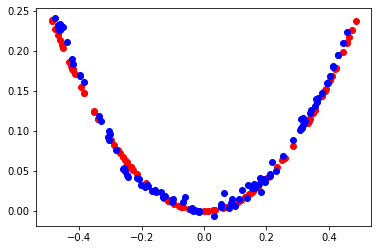

11999 0.5199999809265137 0.49000000953674316


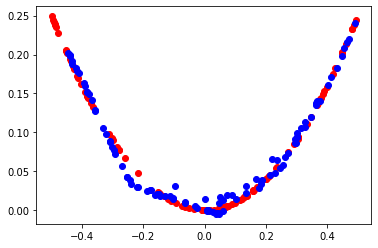

13999 0.5400000214576721 0.699999988079071


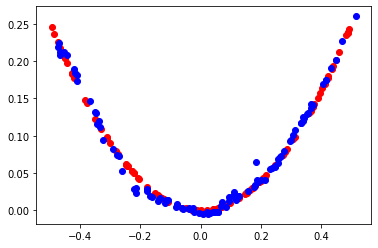

15999 0.3400000035762787 0.6899999976158142


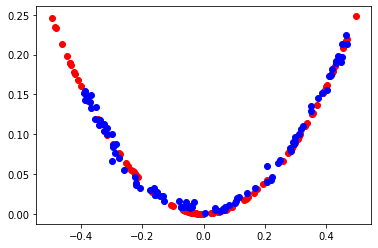

17999 0.5 0.550000011920929


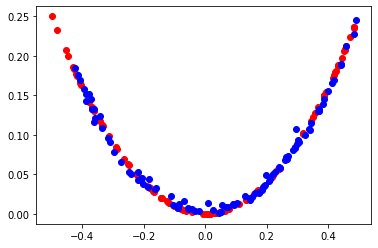

19999 0.5299999713897705 0.5400000214576721


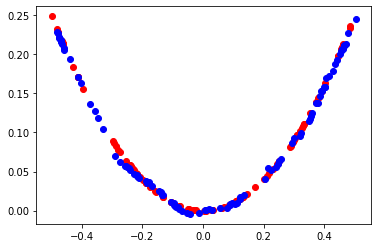

In [83]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=20000, n_batch=64, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)